# Bibliotecas

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer


# Feature Engineering

In [3]:
import pandas as pd
import numpy as np 
data= pd.read_csv("../data/processed/data_processed.csv", index_col="Unnamed: 0")
data

,date,r_fighter,b_fighter,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,time
0,2024-03-23 00:00:00,Rose Namajunas,Amanda Ribas,0.0,0.0,93.0,83.0,1.0,4.0,0.0,0.0,1,1,1,25.0
1,2024-03-23 00:00:00,Karl Williams,Justin Tafa,0.0,0.0,40.0,21.0,7.0,0.0,1.0,0.0,4,1,1,15.0
2,2024-03-23 00:00:00,Edmen Shahbazyan,AJ Dobson,1.0,0.0,27.0,15.0,1.0,0.0,0.0,0.0,3,2,1,4.0
3,2024-03-23 00:00:00,Payton Talbott,Cameron Saaiman,1.0,0.0,79.0,31.0,0.0,0.0,0.0,0.0,1,2,1,5.0
4,2024-03-23 00:00:00,Youssef Zalal,Billy Quarantillo,0.0,0.0,33.0,10.0,2.0,0.0,2.0,0.0,2,3,2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,1994-03-11 00:00:00,Royce Gracie,Minoki Ichihara,0.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,4,3,2,5.0
7492,1994-03-11 00:00:00,Orlando Wiet,Robert Lucarelli,0.0,0.0,8.0,2.0,0.0,1.0,0.0,1.0,4,2,1,2.0
7493,1994-03-11 00:00:00,Frank Hamaker,Thaddeus Luster,0.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0,4,3,3,4.0
7495,1994-03-11 00:00:00,Patrick Smith,Ray Wizard,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4,3,2,0.0


In [3]:
prueba= pd.read_csv("../data/test/ejemplo.csv", index_col="Unnamed: 0")
prueba = prueba.drop(columns = ["r_fighter","b_fighter"])
prueba

,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class
0,0.0,0.0,43.75,37.0,0.0,0.25,0.0,0.5,2


In [4]:
list(prueba.columns)

['r_kd',
 'b_kd',
 'r_str',
 'b_str',
 'r_td',
 'b_td',
 'r_sub',
 'b_sub',
 'weight_class']

In [5]:
data.columns

Index(['date', 'r_fighter', 'b_fighter', 'r_kd', 'b_kd', 'r_str', 'b_str',
       'r_td', 'b_td', 'r_sub', 'b_sub', 'weight_class', 'method',
       'method_detailed', 'time'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

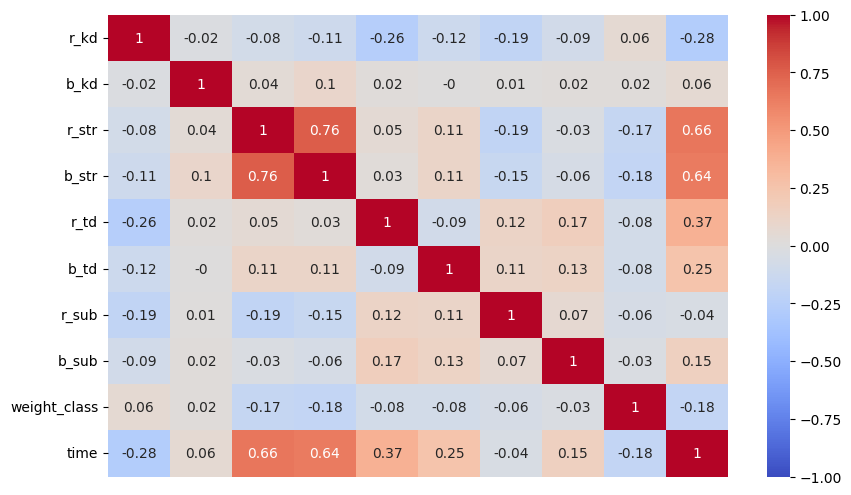

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.heatmap(data.drop(columns=["date","r_fighter","b_fighter","method","method_detailed"]).corr().round(2), 
            annot=True,          
            cmap="coolwarm",     
            vmin=-1,
            vmax=1,
            cbar=True) 
ax.set_xticks([])

plt.savefig("../ppt/images/heatmap_sin_fondo.png", transparent=True, bbox_inches='tight');

# Dividir en Train y Test

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
train, test = train_test_split(data, random_state=42, test_size=0.2)

train = train.drop(columns=["date","r_fighter","b_fighter","method","method_detailed"])
test = test.drop(columns=["date","r_fighter","b_fighter","method","method_detailed"])

# train.to_csv("../data/train/train.csv")
# test.to_csv("../data/test/test.csv")

print(train.shape)
print(test.shape)

(5903, 10)
(1476, 10)


# Modelos

Preparación Train/test

In [10]:
X = train.drop(columns=["time"])
y = train["time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4722, 9)
(1181, 9)
(4722,)
(1181,)


# Linear Regresor

In [18]:
model_linear_regresor = LinearRegression()
model_linear_regresor.fit(X_train, y_train)
y_pred = model_linear_regresor.predict(X_test)

In [19]:
mae_regresion = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae_regresion}')

Mean Absolute Error (MAE): 2.959110485143614


In [20]:
testing = pd.read_csv("../data/test/test.csv", index_col = 0)
testing

X_real = testing.drop(columns=["time"])
y_real= testing["time"]

In [21]:
model_linear_regresor.predict(X_real)

array([29.28313595,  4.17290305,  6.87733385, ...,  3.7209169 ,
       10.05669945,  9.80552067])

In [27]:
mae_model_linear_regresor = mean_absolute_error(y_real, model_linear_regresor.predict(X_real))
print(f'Mean Absolute Error (MAE): {mae_model_linear_regresor}')

Mean Absolute Error (MAE): 2.927466074797482


Visualizacion

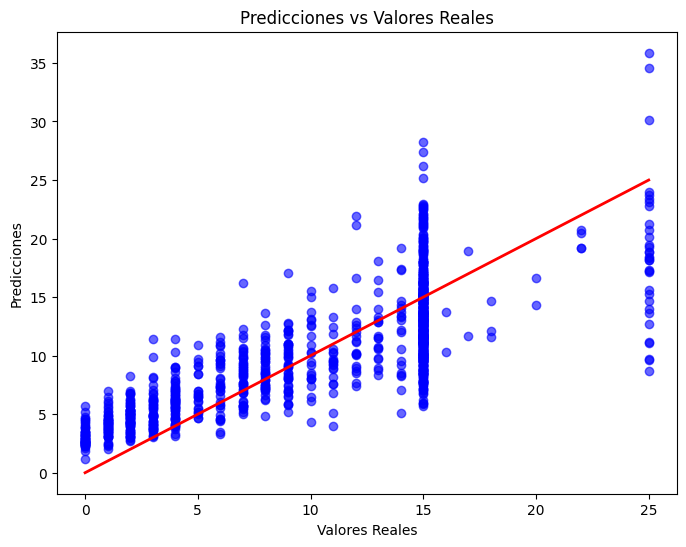

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

### Modelo 2: Decision Tree Regressor

In [29]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [30]:
# Evaluación del modelo
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"Mean Squared Error (MSE): {mse_dt}")


Mean Absolute Error (MAE): 2.3975063976222164
Mean Squared Error (MSE): 11.911184540457619


In [33]:
mae_dt_regresor = mean_absolute_error(y_real, dt_model.predict(X_real))
print(f'Mean Absolute Error (MAE): {mae_dt_regresor}')

Mean Absolute Error (MAE): 2.5162526109634284


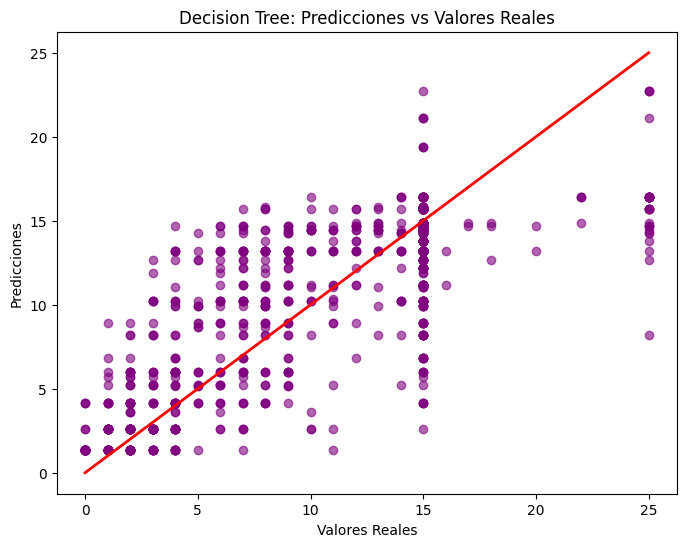

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Decision Tree: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


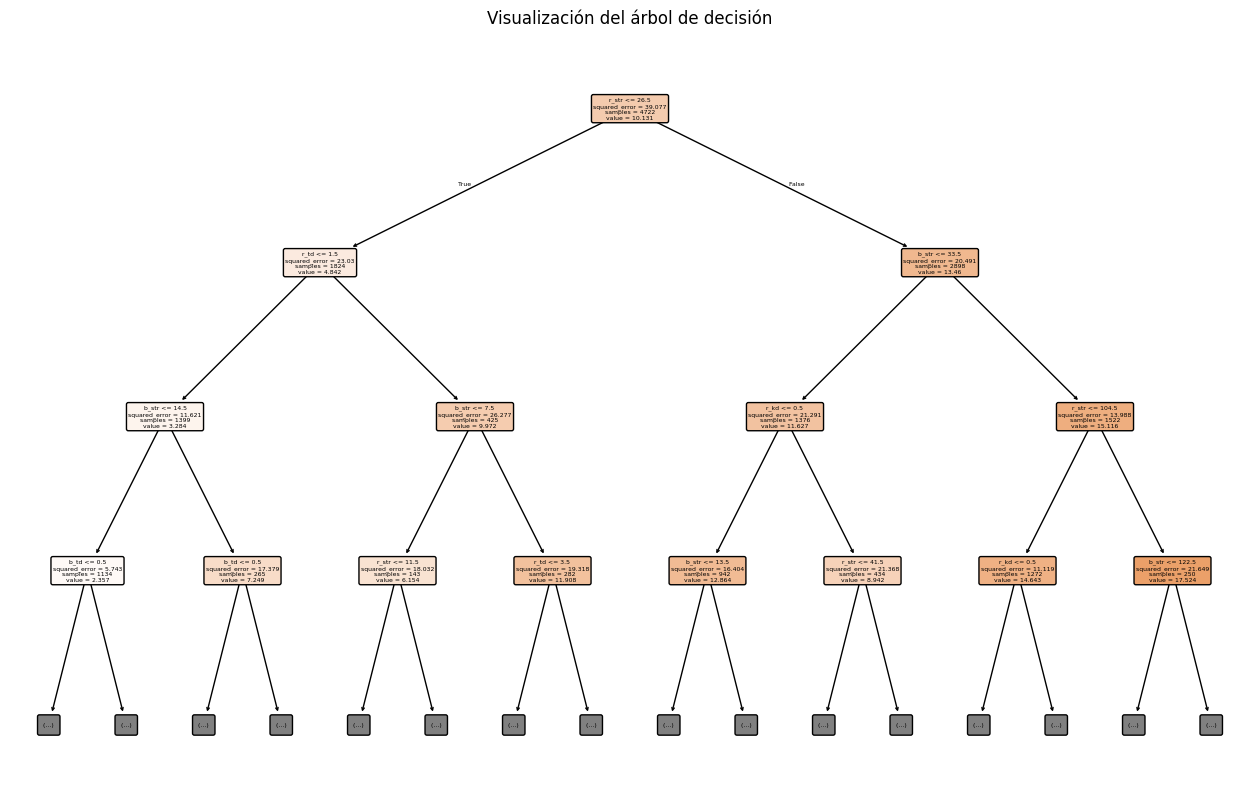

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.title("Visualización del árbol de decisión")
plt.show()


### Modelo 3: RandomForestRegressor

In [11]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [35]:
# Evaluación del modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")


Mean Absolute Error (MAE): 2.1747709632309546
Mean Squared Error (MSE): 10.091912067532077


In [37]:
mae_rf_regresor = mean_absolute_error(y_real, rf_model.predict(X_real))
print(f'Mean Absolute Error (MAE): {mae_rf_regresor}')

Mean Absolute Error (MAE): 2.1733985340728226


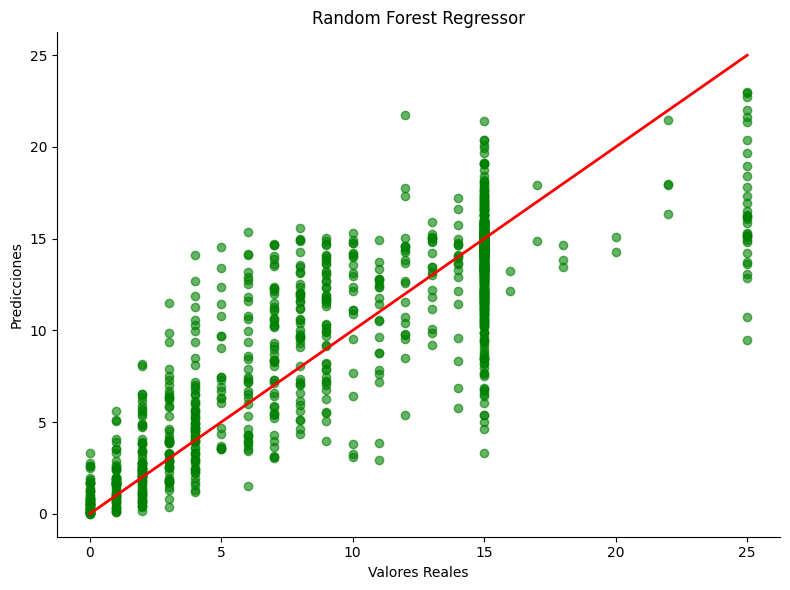

In [129]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Random Forest Regressor')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

#Ocultar ejes
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

plt.tight_layout()
plt.savefig("../ppt/images/prediccion_modelo.png", transparent=True, dpi=300);

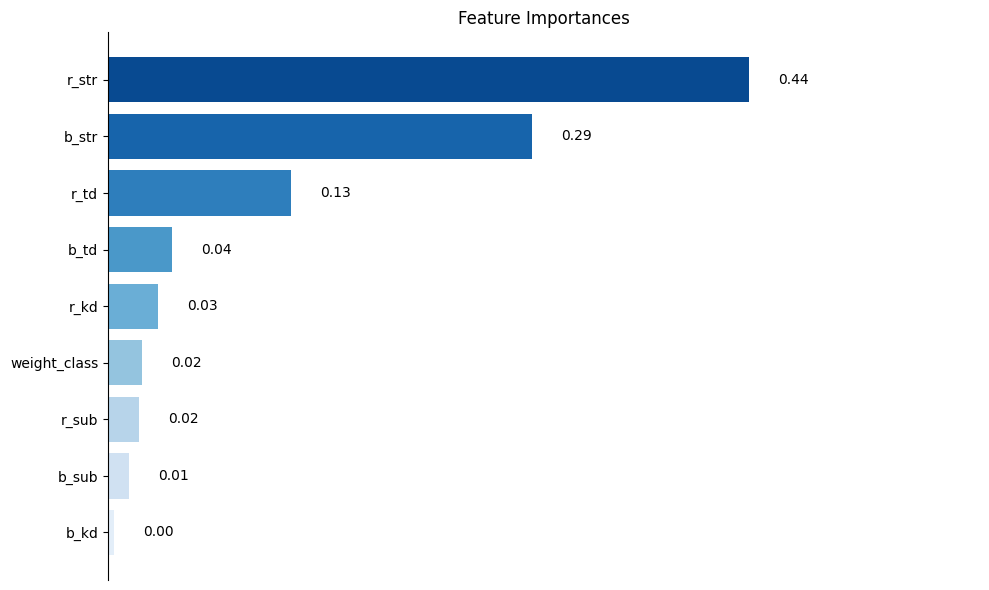

In [136]:
# Importancia de las características
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)


paleta_azul = sns.color_palette("Blues", n_colors=len(feature_importances))[::-1]


# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importances['feature'], feature_importances['importance'], color=paleta_azul)
plt.title('Feature Importances')

# Ocultar ejes
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)


plt.xlim(0, 0.6)

plt.gca().invert_yaxis()

ax.spines["bottom"].set_visible(False)
ax.get_xaxis().set_visible(False)

#Añadir los valores sobre cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.savefig("../ppt/images/feature_importance.png", transparent=True, dpi=300);


tuneado

In [12]:
rf_tuned = RandomForestRegressor(n_estimators=200,
                                 max_depth=10,
                                 min_samples_split=5,
                                 random_state=42)

rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

# Reevaluar el modelo ajustado
mae_rf_regresor_t = mean_absolute_error(y_test, y_pred_rf_tuned)
print(f"Tuned MAE: {mae_rf_regresor_t}")


Tuned MAE: 2.073488315513101


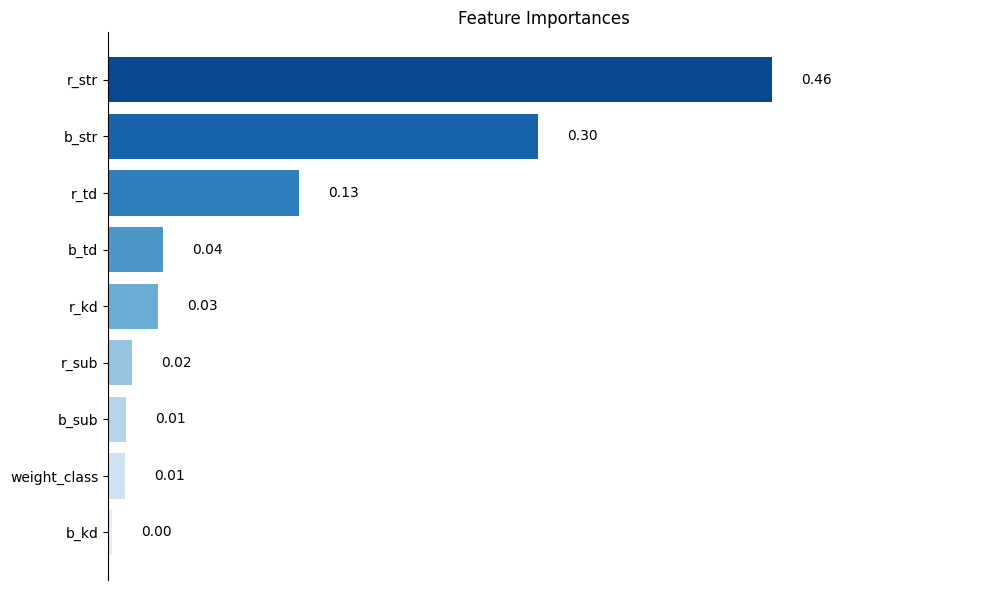

In [13]:
# Importancia de las características
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_tuned.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)


paleta_azul = sns.color_palette("Blues", n_colors=len(feature_importances))[::-1]


# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importances['feature'], feature_importances['importance'], color=paleta_azul)
plt.title('Feature Importances')

# Ocultar ejes
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)


plt.xlim(0, 0.6)

plt.gca().invert_yaxis()

ax.spines["bottom"].set_visible(False)
ax.get_xaxis().set_visible(False)

#Añadir los valores sobre cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.savefig("../ppt/images/feature_importance.png", transparent=True, dpi=300);


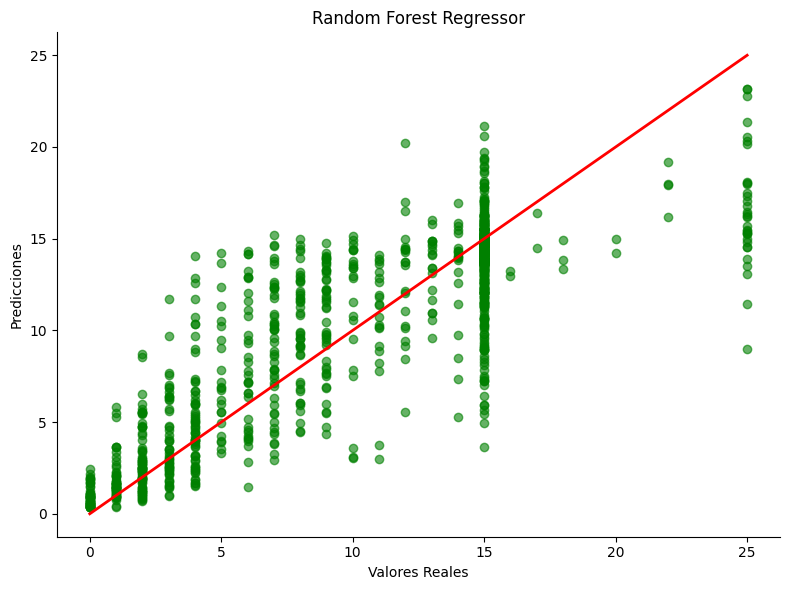

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_tuned, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Random Forest Regressor')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

#Ocultar ejes
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

plt.tight_layout()
plt.savefig("../ppt/images/prediccion_modelo.png", transparent=True, dpi=300);

test

In [44]:
mae_rf_regresor_tuned = mean_absolute_error(y_real, rf_tuned.predict(X_real))
print(f'Mean Absolute Error (MAE): {mae_rf_regresor_tuned}')

Mean Absolute Error (MAE): 2.1053862688026506


prueba

In [45]:
rf_tuned.predict(prueba)

array([14.59106404])

### Modelo 4: XGBoostregressor

In [46]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [47]:
# Evaluar el desempeño del modelo
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")


Mean Absolute Error (MAE): 2.078154889634865
Mean Squared Error (MSE): 9.36316358674124


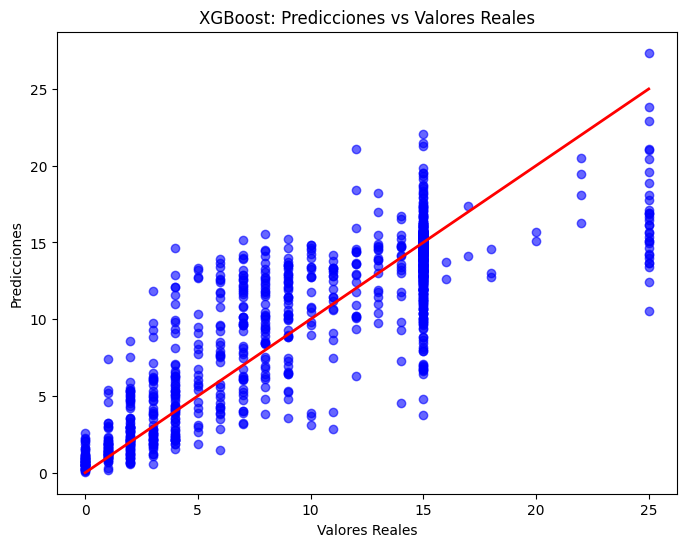

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('XGBoost: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


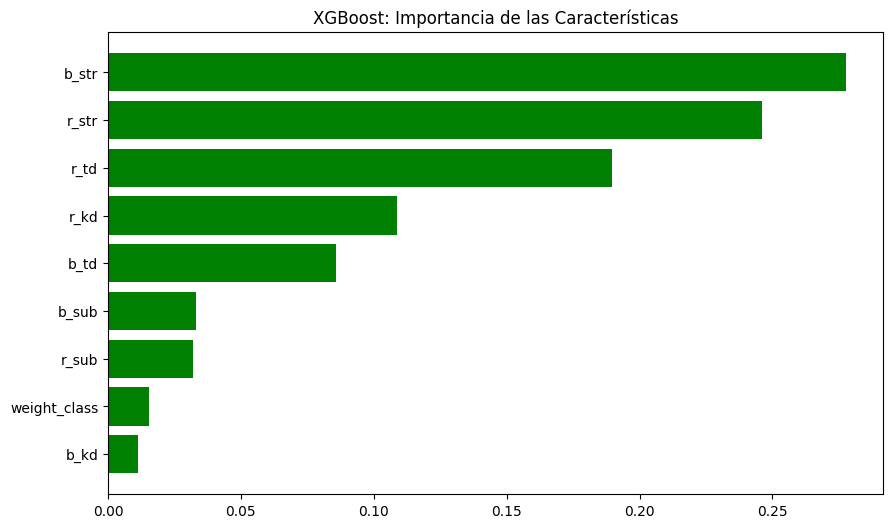

In [49]:
# Importancia de las características
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': xgb_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='green')
plt.title('XGBoost: Importancia de las Características')
plt.gca().invert_yaxis()
plt.show()


In [50]:
xgb_tuned = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_tuned.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Reevaluar el modelo ajustado
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
print(f"Tuned MAE: {mae_xgb_tuned}")


Tuned MAE: 2.0818582262203513


In [52]:
mmae_xgb_tuned = mean_absolute_error(y_real, xgb_tuned.predict(X_real))
print(f'Mean Absolute Error (MAE): {mmae_xgb_tuned}')

Mean Absolute Error (MAE): 2.157012382749377


prueba

In [53]:
xgb_tuned.predict(prueba)

array([13.884951], dtype=float32)

### Modelo 5: Red Neuronal

In [54]:
# Definir la arquitectura de la red
model_red = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Capa oculta 1
    Dropout(0.2),                                              # Regularización
    Dense(64, activation='relu'),                              # Capa oculta 2
    Dropout(0.2),
    Dense(1)                                                   # Capa de salida para regresión
])

# Compilar el modelo
model_red.compile(optimizer='adam', loss='mse', metrics=['mae'])


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# Entrenar el modelo
history = model_red.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=1)


Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 42.4985 - mae: 4.7257 - val_loss: 20.6049 - val_mae: 3.4277
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.9930 - mae: 3.4032 - val_loss: 18.4338 - val_mae: 3.2289
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.8002 - mae: 3.0817 - val_loss: 13.8077 - val_mae: 2.7902
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.5383 - mae: 3.0415 - val_loss: 17.6118 - val_mae: 3.1231
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.3376 - mae: 2.9241 - val_loss: 15.3515 - val_mae: 2.9198
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.3674 - mae: 2.9593 - val_loss: 13.9804 - val_mae: 2.7789
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.6033 - mae: 2.9020 - val_loss: 14.6171 - val_mae: 2.8375
Epoch 8/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.8589 - mae: 2.8687 - val_loss: 12.2823 - val_mae: 2.6176
Epoch 9/100
119/119 ━━━━━━━━━━━━

In [56]:
# Predicciones en el conjunto de prueba
y_pred_ann = model_red.predict(X_test).flatten()

# Evaluación
mae_ann = mean_absolute_error(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)

print(f"Mean Absolute Error (MAE): {mae_ann}")
print(f"Mean Squared Error (MSE): {mse_ann}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 2.104285546423115
Mean Squared Error (MSE): 9.394989267459506


In [58]:
mae_rn = mean_absolute_error(y_real, model_red.predict(X_real))
print(f'Mean Absolute Error (MAE): {mae_rn}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
Mean Absolute Error (MAE): 2.151178185694263


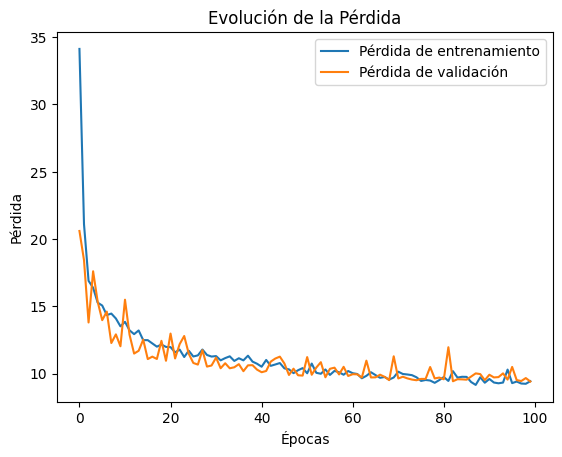

In [60]:
import matplotlib.pyplot as plt

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


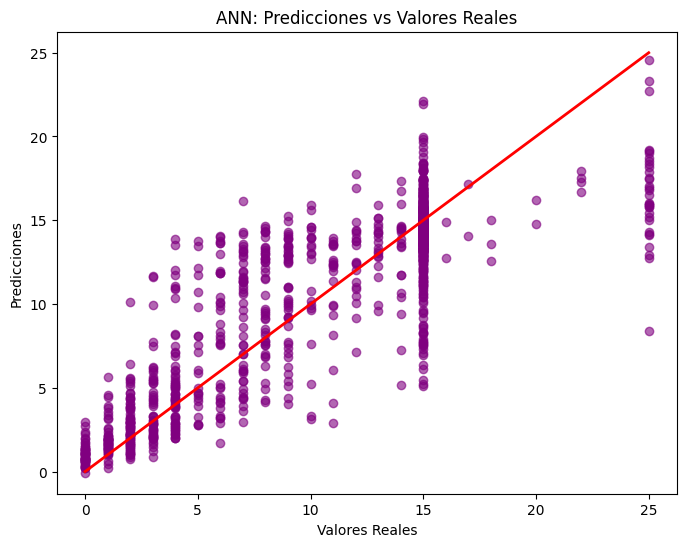

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ann, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('ANN: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


In [62]:
model_red.predict(prueba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[13.996642]], dtype=float32)

## Modelos No supervisados

### Modelo 6: Kmeans

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [64]:
metrics_media = pd.read_csv("../data/processed/metrics_media.csv")

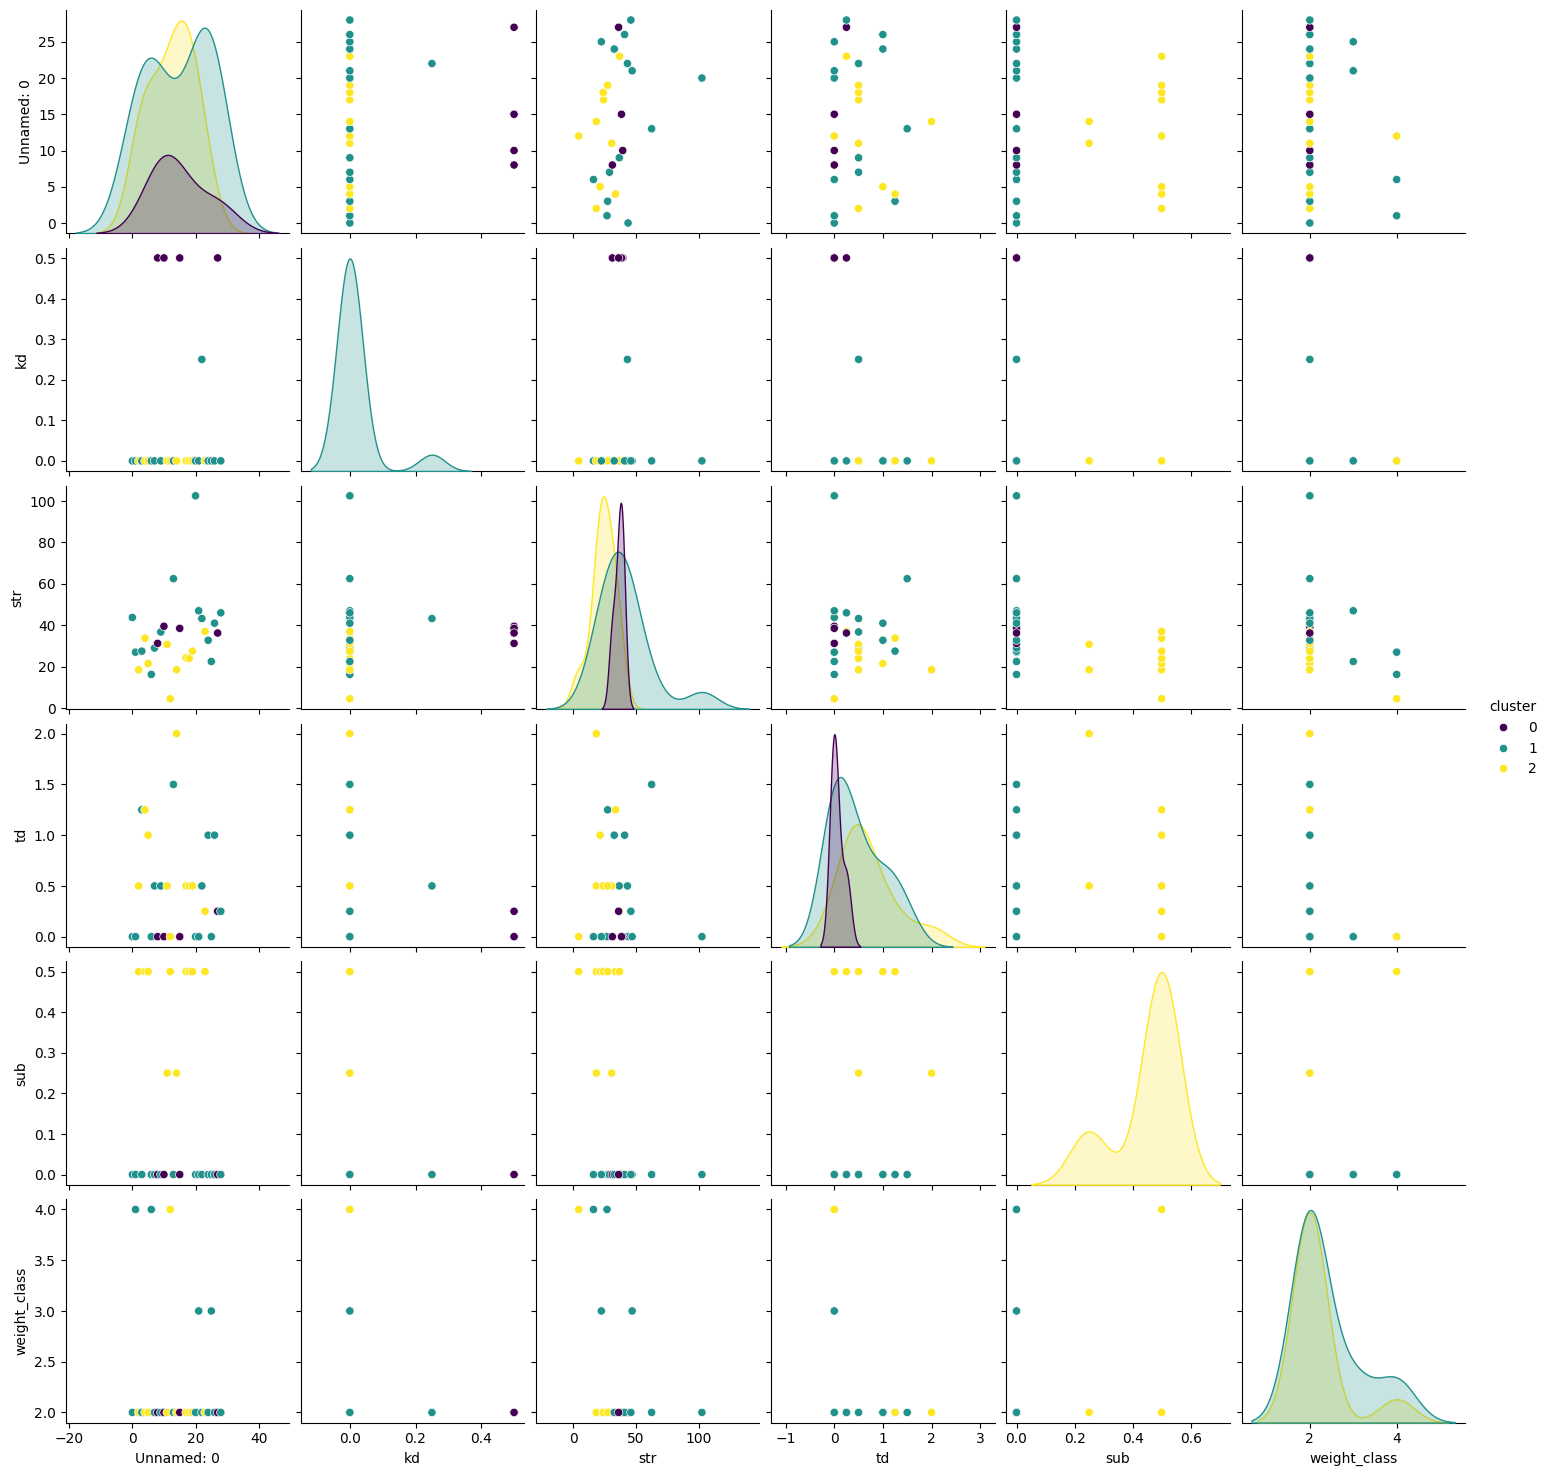

In [65]:

# Estandarizar las métricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(metrics_media[['kd', 'str', 'td', 'sub']])

# Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Agregar los clústeres al dataframe
metrics_media['cluster'] = kmeans.labels_

# Visualización de los clústeres
sns.pairplot(metrics_media, hue='cluster', diag_kind='kde', palette='viridis')
plt.show()


### Modelo 7: PCA

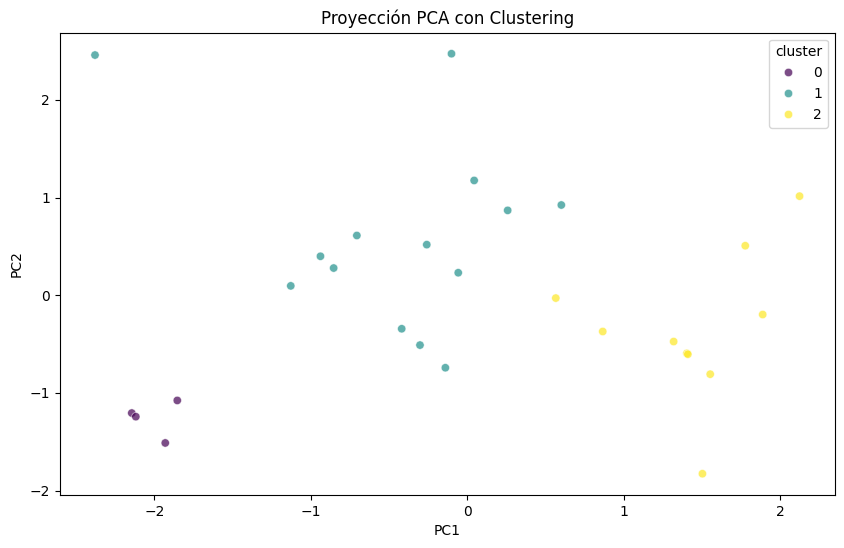

In [66]:
from sklearn.decomposition import PCA

# Reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un dataframe con las componentes principales
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = kmeans.labels_

# Visualizar los datos en el espacio reducido
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis', alpha=0.7)
plt.title('Proyección PCA con Clustering')
plt.show()


###

### Modelo 8: GradientBoostingRegressor

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

# Entrenar el modelo Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predicciones
y_pred = gbr.predict(X_test)

# Métrica de evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE Gradient Boosting: {mae}")


MAE Gradient Boosting: 2.143762310097538


In [69]:
mae_gbr = mean_absolute_error(y_real, gbr.predict(X_real))
print(f'Mean Absolute Error (MAE): {mae_gbr}')

Mean Absolute Error (MAE): 2.191069508431289


In [70]:
gbr.predict(prueba)

array([13.07363832])

### Modelo 9: LightGBM

In [77]:
from lightgbm import LGBMRegressor

# Entrenar el modelo LightGBM
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

# Predicciones
y_pred = lgbm.predict(X_test)

# Métrica de evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE LightGBM: {mae}")


y_pred = lgbm.predict(X_real)
mae_lgbm = mean_absolute_error(y_real, y_pred)
print(f'Mean Absolute Error (MAE): {mae_lgbm}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 4722, number of used features: 9
[LightGBM] [Info] Start training from score 10.130877
MAE LightGBM: 2.114942660551314
Mean Absolute Error (MAE): 2.1739517433634625


In [74]:
import pickle

In [ ]:
# with open('../models/ufc_model.pkl', 'wb') as model_file:
#     pickle.dump(lgbm, model_file)

In [ ]:
# with open('../models/ufc_model.pkl', 'rb') as model_file:
#     lgbm = pickle.load(model_file)

In [75]:

# Gráfico de dispersión: Valores reales vs predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.values.ravel(), y=y_pred.ravel(), alpha=0.7)  # Ahora son vectores 1D
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.legend()
plt.show()




ValueError: All arrays must be of the same length

<Figure size 1000x600 with 0 Axes>

In [79]:
# Histograma de los errores
y_test_ravel = y_test.values.ravel()
y_pred_ravel = y=y_pred.ravel()
errors = y_test_ravel - y_pred_ravel
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue', bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', label='Error=0')
plt.xlabel("Error (Real - Predicción)")
plt.title("Distribución de Errores")
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (1181,) (1476,) 

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_11696\310960451.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


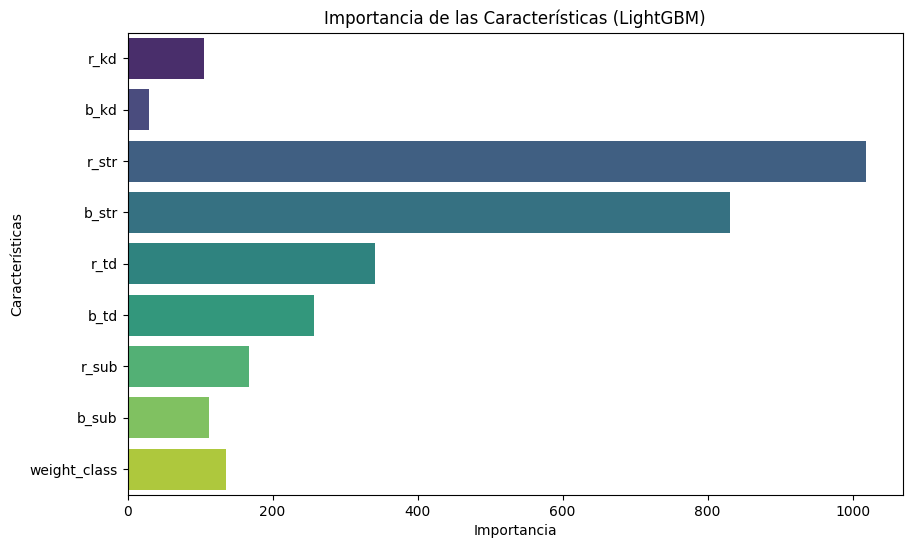

In [ ]:
# Importancia de características
importances = lgbm.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Importancia de las Características (LightGBM)")
plt.xlabel("Importancia")
plt.ylabel("Características")

plt.show()

### Modelo 10: SupportVectorMachine

In [80]:
from sklearn.svm import SVR

# Entrenar el modelo SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predicciones
y_pred = svr.predict(X_test)

# Métrica de evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE SVR: {mae}")


MAE SVR: 2.334964032428689


In [82]:
mae_svr = mean_absolute_error(y_real, svr.predict(X_real))
print(f'Mean Absolute Error (MAE): {mae_svr}')

Mean Absolute Error (MAE): 2.4793224519835593


### Modelo 11: CatBoost

In [ ]:
# from catboost import CatBoostRegressor

# # Entrenar el modelo CatBoost
# catboost = CatBoostRegressor(verbose=0, random_state=42)
# catboost.fit(X_train, y_train)

# # Predicciones
# y_pred = catboost.predict(X_test)

# # Métrica de evaluación
# mae = mean_absolute_error(y_test, y_pred)
# print(f"MAE CatBoost: {mae}")


### Modelo 12: Ridge Regression

In [83]:
from sklearn.linear_model import Ridge

# Entrenar el modelo Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predicciones
y_pred = ridge.predict(X_test)

# Métrica de evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE Ridge: {mae}")


MAE Ridge: 2.9591187556723426


In [84]:
mae_ridge = mean_absolute_error(y_real, ridge.predict(X_real))
print(f"MAE Ridge: {mae_ridge}")

MAE Ridge: 2.9274944463378887


# PipeLine

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), X.columns)  # Escalar características numéricas
])

# 3. Definir los modelos
models = {"LinearRegression": LinearRegression(),
            "DecisionTree": DecisionTreeRegressor(random_state=42),
            "RandomForest": RandomForestRegressor(random_state=42, n_estimators=100),
            "XGBoost": XGBRegressor(random_state=42, n_estimators=100),
            "LightGBM": LGBMRegressor(random_state=42, n_estimators=100)}

# 4. Crear y evaluar los pipelines
for name, model in models.items():
    # Crear el pipeline
    pipeline = Pipeline([('preprocessor', preprocessor),  
                        ('model', model)])
    
    # Evaluar con validación cruzada
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f"{name}: Mean Absolute Error: {-np.mean(scores):.2f}")


LinearRegression: Mean Absolute Error: 2.89
DecisionTree: Mean Absolute Error: 2.61


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312

RandomForest: Mean Absolute Error: 2.10
XGBoost: Mean Absolute Error: 2.20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 3777, number of used features: 9
[LightGBM] [Info] Start training from score 10.165210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 335
[LightGBM] [Info] Number of data points in the train set: 3777, number of used features: 9
[LightGBM] [Info] Start training from score 10.198570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is no

c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 3778, number of used features: 9
[LightGBM] [Info] Start training from score 10.076231
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 3778, number of used features: 9
[LightGBM] [Info] Start training from score 10.102700
LightGBM: Mean Absolute Error: 2.07


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Prueba de pelea

In [ ]:
import pandas as pd

# Diccionario con los MAE de cada modelo (valores escalares)
comparaciones = pd.DataFrame({
    "Modelo": ["LinearRegression", "DecisionTreeRegresor", "RandomForestRegressor", 
               "RandomForestTuned", "XGBoostTuned", "RedNeuronal", 
               "GradientBoostingRegressor", "LightGBM", "SupportVectorMachine", "RidgeRegressor"],
    "MAE": [mae_model_linear_regresor.round(2), mae_dt_regresor.round(2), 
            mae_rf_regresor.round(2), mae_rf_regresor_tuned.round(2), 
            mmae_xgb_tuned.round(2), mae_rn.round(2), 
            mae_gbr.round(2), mae_lgbm.round(2), 
            mae_svr.round(2), mae_ridge.round(2)]
})

comparaciones_ordenadas = comparaciones.sort_values(by="MAE", ascending=True).reset_index(drop=True)

# Mostrar el DataFrame ordenado
comparaciones_ordenadas

,Modelo,MAE
0,RandomForestTuned,2.11
1,redNeuronal,2.15
2,CGBoostTuned,2.16
3,RandomForestRegressor,2.17
4,LightGBM,2.17
5,GradientBoostingRegressor,2.19
6,SupportVectorMachine,2.48
7,RegressionClassifier,2.52
8,LinearRegression,2.93
9,RidgeRegressor,2.93


Visualizacion:

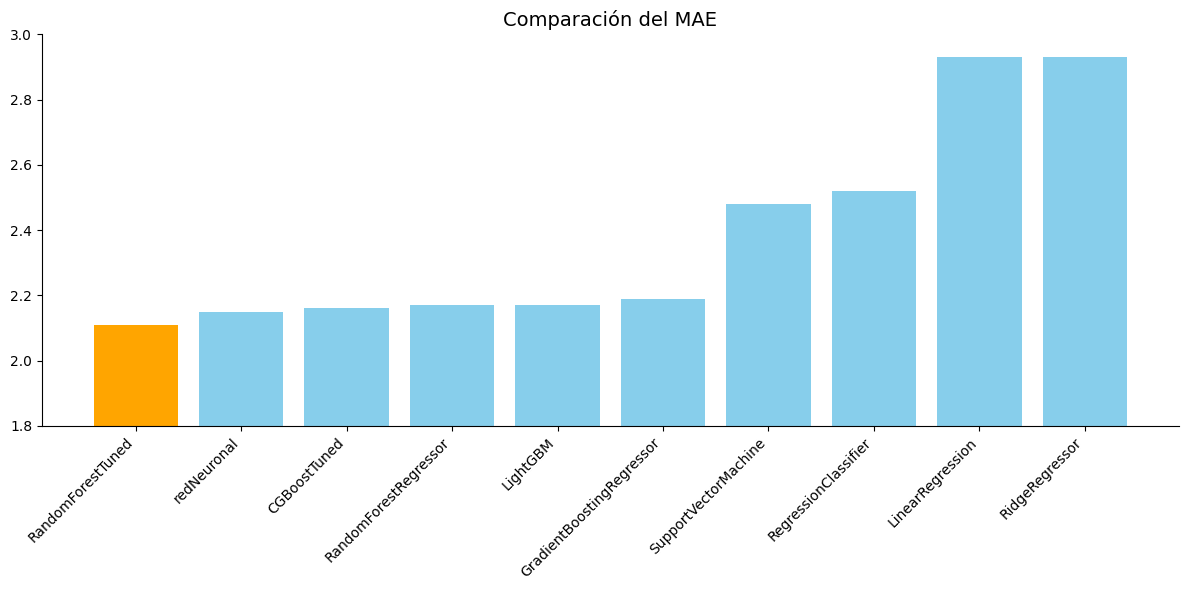

In [ ]:
plt.figure(figsize=(12, 6))
paleta_azul = sns.color_palette("Blues", n_colors=len(comparaciones_ordenadas))

colores = ["skyblue" if modelo != "RandomForestTuned" else "orange" for modelo in comparaciones_ordenadas["Modelo"]]

plt.bar(comparaciones_ordenadas["Modelo"], comparaciones_ordenadas["MAE"], color=colores)

#Ocultar ejes
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

plt.title("Comparación del MAE", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotar etiquetas del eje X
plt.ylim(1.8, 3)

plt.tight_layout()

plt.savefig("../ppt/images/comparaciones_mae.png", transparent=True, dpi=300);